# Climate Change Adaptation to Flood Based on Societal Risks

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context, based on the societal risks. The model will simulate the complex behavior of adaptation of households according to societal risks and government's policy (collective adaptations).

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` 
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The Government agent will decide on the policy and collective adaptations according to the societal data and FN curve. The household and the government will have many interactions, and these will lead to households' decision on the adaptations.

The current implementation includes many assumptation, such as some parameters in FN standard. We cannot have a perfect data for these. 
If the model can be later used beyond the assignment, these can be also considered more comprehensively.

We try to make the model fit the RBB requirement, and start from the societal risk perspective. As a result, we did this model according to 
what we can find, and thus we have made many adaptations for the assignment introduction.

Our group have very few knowledge in coding, so if the style of writing the code is not perfect, we applogize for this.

_This notebook was tested on 2023-1-31 with Mesa version 2.1.4 on Python 3.9.12._

# Running the model and visualizing the model domain and social network over time

  0%|          | 0/1 [00:00<?, ?it/s]

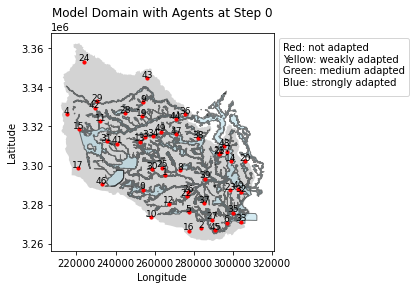

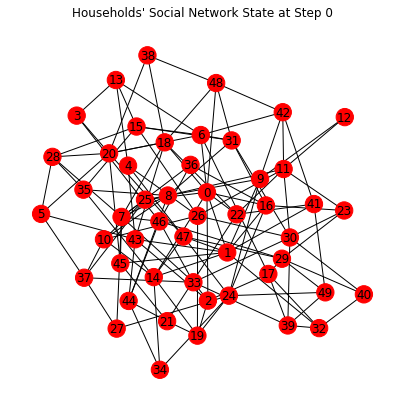

<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

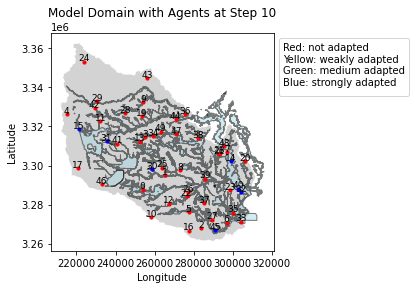

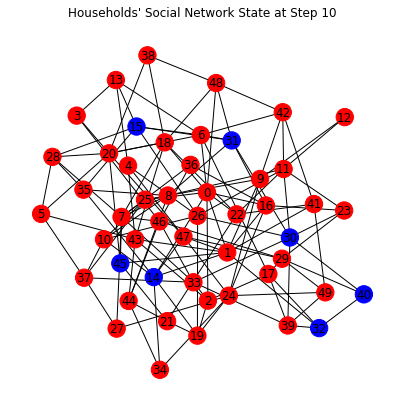

<Figure size 720x432 with 0 Axes>

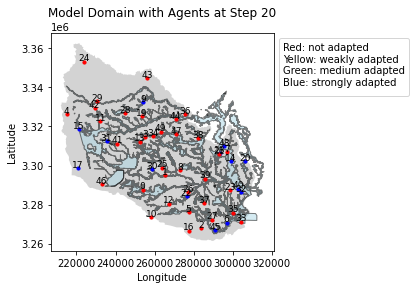

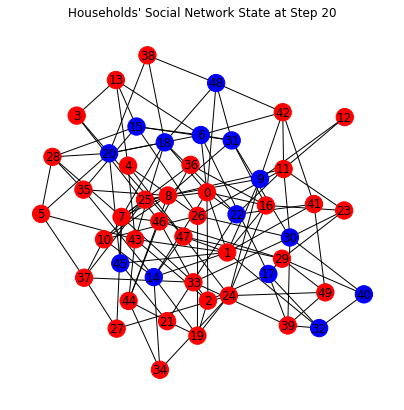

<Figure size 720x432 with 0 Axes>

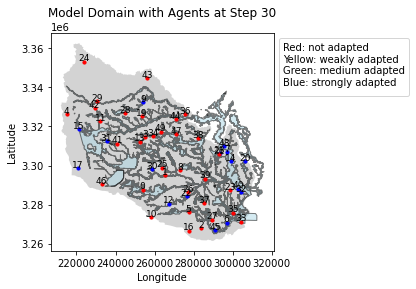

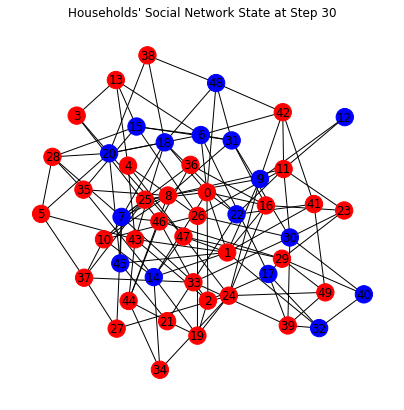

<Figure size 720x432 with 0 Axes>

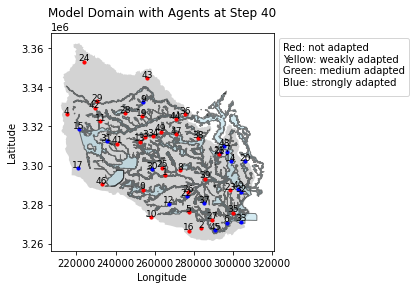

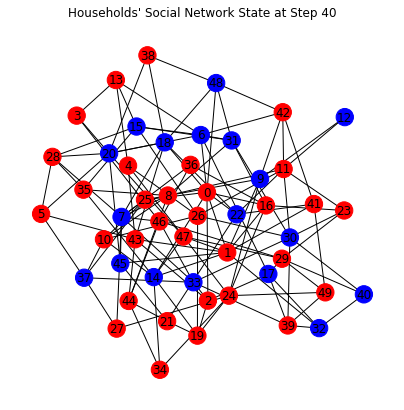

<Figure size 720x432 with 0 Axes>

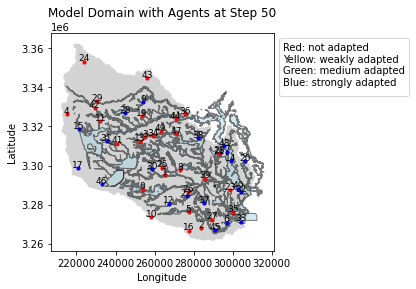

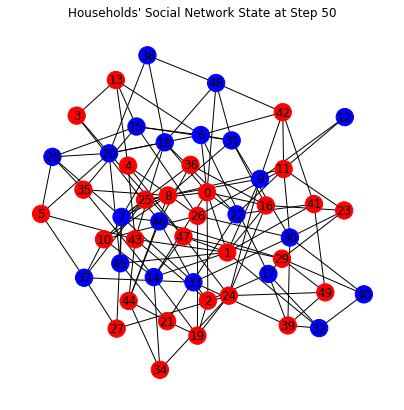

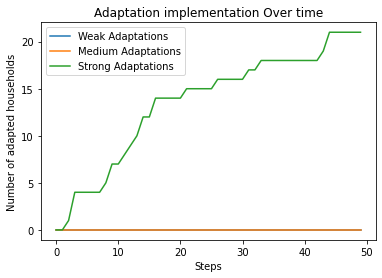

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from agents import Households
import os
from mesa import batch_run

import numpy as np

parameters = {"a":0.5,"b":1.2,"flood_map_choice":"100yr", "network":"erdos_renyi", "APE":0.01, "C":0.01, "alpha":1,"societal_risk":True}
from mesa import batch_run
param_sweep = batch_run(AdaptationModel, parameters,iterations=1, max_steps=4500)

# Initialize the Adaptation Model with 50 household agents. options for C: 0.01 or 2.234 or 1, alpha = 1 or 0.703
model = AdaptationModel(number_of_households=50, flood_map_choice=parameters['flood_map_choice'], network=parameters['network'], a=parameters['a'], b=parameters['b'], APE=parameters['APE'], C=parameters['C'], alpha=parameters['alpha'], societal_risk=parameters['societal_risk']) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    plot_list = [agent for agent in model.schedule.agents if isinstance(agent, Households)]
    colors = [
    'yellow' if agent.is_adapted_weak else
    'green' if agent.is_adapted_medium else
    'blue' if agent.is_adapted_strong else
    'red'
    for agent in plot_list]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Households' Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function writSten in the model.py
model.plot_model_domain_with_agents("Images_ABM")

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

def save_plot_to_folder(fig, filename):
    downloads_directory = os.path.expanduser("~/Downloads")
    Images_ABM = os.path.join(downloads_directory, "Images_ABM")
    os.makedirs(Images_ABM, exist_ok=True)
    filepath = os.path.join(Images_ABM, filename)
    fig.savefig(filepath)
    
save_plot_to_folder(plt.gcf(), "initial_spatial_plot.png")
save_plot_to_folder(fig, "initial_network_plot.png")

# Run the model for 5 steps and generate plots every 1 steps. ##stop model after flood event as what happens after is not relevant
for step in range(50):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 10 == 0: ## Changed this to 1
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents("Images_ABM")

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        save_plot_to_folder(fig, f"network_plot_step_{step + 1}.png")
        plt.show()
   
plt.clf()
steprange = list(range(50)) 
plt.plot(steprange, model.weak_adaptations, label='Weak Adaptations')
plt.plot(steprange, model.medium_adaptations, label='Medium Adaptations')
plt.plot(steprange, model.strong_adaptations, label='Strong Adaptations')

plt.xlabel('Steps')
plt.ylabel('Number of adapted households')
plt.title('Adaptation implementation Over time')
plt.legend()
save_plot_to_folder(plt, f"final_graph.png")
plt.show()


In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

DeathEstimated  DeathActual IsAdaptedWeakly IsAdaptedMedium  \
Step AgentID                                                                
0    0              0.000000          NaN           False           False   
     50                  NaN          NaN            None            None   
     1              0.000000          NaN           False           False   
     51                  NaN          NaN            None            None   
     2              0.000000          NaN           False           False   
...                      ...          ...             ...             ...   
49   97                  NaN     0.000000            None            None   
     48             7.851559     0.000000           False           False   
     98                  NaN     7.851559            None            None   
     49             0.000000     0.000000           False           False   
     99                  NaN     0.000000            None            None   

             IsAdaptedStrongly  
Step AgentID                    
0    0                   False  
     50                   None  
     1                   False  
     51                   None  
     2                   False  
...                        ...  
49   97                   None  
     48                   True  
     98                   None  
     49                  False  
     99                   None  

[5000 rows x 5 columns]

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,0
2,1
3,4
4,4
5,4
6,4
7,4
8,5
9,7
